<a href="https://colab.research.google.com/github/khp53/Credit-Card-Fraud-Detection-SecureBoost/blob/main/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.0/154.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.7/174.7 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 6.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sdv.single_table import CTGANSynthesizer
from sdv.evaluation.single_table import run_diagnostic
import numpy as np
import datetime as dt

In [ ]:
# Load or create a dataset
real_data = pd.read_csv('creditcard.csv')

# We will need additional metadata as this dataset does not include much valuable metadata
# For PCI complience all of them are encrypted.

# External Metadata
merchant_category = ["Grocery", "Electronics", "Clothing", "Travel", "Restaurants"]
real_data["Merchant Category"] = np.random.choice(merchant_category, size=len(real_data))

device_type = ["Mobile", "Desktop", "Tablet"]
real_data["Device Type"] = np.random.choice(device_type, size=len(real_data))

locations = ["City A", "City B", "City C"]
real_data["Location"] = np.random.choice(locations, size=len(real_data))

# HEre we are using the existing time values from our real_data to calculate a time stamp for metadata
timestamp_start = dt.datetime(2022, 11, 14)
real_data["Transaction Timestamp"] = real_data["Time"].apply(lambda x: timestamp_start + dt.timedelta(days=x))

payment_methods = ["Credit Card", "Debit Card", "Apple Pay", "Google Pay", "Interact"]
real_data["Payment Method"] = np.random.choice(payment_methods, size=len(real_data))

channel = ["Online", "In-Store", "POS"]
real_data["Channel"] = np.random.choice(channel, size=len(real_data))

season = ["Winter", "Spring", "Summer", "Holiday"]
real_data["Season"] = np.random.choice(season, size=len(real_data))

card_types = ["Visa", "MasterCard", "American Express", "Discover"]
real_data["Card Type"] = np.random.choice(card_types, size=len(real_data))

real_data["Credit Limit"] = np.random.uniform(1000, 10000, size=len(real_data))
real_data["Cardholder Risk Score"] = np.random.uniform(300, 850, size=len(real_data))
real_data["Number of Active Cards"] = np.random.randint(1, 5, size=len(real_data))
real_data["Loyalty Points Available"] = np.random.randint(0, 5000, size=len(real_data))

In [ ]:
def generate_card_id(card_type):
    if card_type == 'Visa':
        return '4' + ''.join(np.random.choice(list('0123456789'), size=15))
    elif card_type == 'MasterCard':
        prefix = np.random.choice(['51', '52', '53', '54', '55'] + [str(i) for i in range(2221, 2721)])
        return prefix + ''.join(np.random.choice(list('0123456789'), size=16-len(prefix)))
    elif card_type == 'American Express':
        prefix = np.random.choice(['34', '37'])
        return prefix + ''.join(np.random.choice(list('0123456789'), size=13))
    elif card_type == 'Discover':
        prefix = np.random.choice(['6011'] + [str(i) for i in range(622126, 622926)] + ['644', '645', '646', '647', '648', '649', '65'])
        return prefix + ''.join(np.random.choice(list('0123456789'), size=16-len(prefix)))
    else:
        return None

In [ ]:
real_data['Card ID'] = real_data['Card Type'].apply(generate_card_id)

In [ ]:
real_data.to_csv("augmented_creditcard.csv", index=False)

In [ ]:
from sdv.metadata import SingleTableMetadata

augmented_data = pd.read_csv("augmented_creditcard.csv")

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(augmented_data)

print(metadata.to_dict())

# Save metadata to json for later reading
metadata.save_to_json("creditcard_metadata.json")
print("Metadata saved!")

{'primary_key': 'Card ID', 'columns': {'Time': {'sdtype': 'numerical'}, 'V1': {'sdtype': 'numerical'}, 'V2': {'sdtype': 'numerical'}, 'V3': {'sdtype': 'numerical'}, 'V4': {'sdtype': 'numerical'}, 'V5': {'sdtype': 'numerical'}, 'V6': {'sdtype': 'numerical'}, 'V7': {'sdtype': 'numerical'}, 'V8': {'sdtype': 'numerical'}, 'V9': {'sdtype': 'numerical'}, 'V10': {'sdtype': 'numerical'}, 'V11': {'sdtype': 'numerical'}, 'V12': {'sdtype': 'numerical'}, 'V13': {'sdtype': 'numerical'}, 'V14': {'sdtype': 'numerical'}, 'V15': {'sdtype': 'numerical'}, 'V16': {'sdtype': 'numerical'}, 'V17': {'sdtype': 'numerical'}, 'V18': {'sdtype': 'numerical'}, 'V19': {'sdtype': 'numerical'}, 'V20': {'sdtype': 'numerical'}, 'V21': {'sdtype': 'numerical'}, 'V22': {'sdtype': 'numerical'}, 'V23': {'sdtype': 'numerical'}, 'V24': {'sdtype': 'numerical'}, 'V25': {'sdtype': 'numerical'}, 'V26': {'sdtype': 'numerical'}, 'V27': {'sdtype': 'numerical'}, 'V28': {'sdtype': 'numerical'}, 'Amount': {'sdtype': 'numerical'}, 'Class

In [ ]:
json_metadata = SingleTableMetadata.load_from_json("creditcard_metadata.json")

synthesizer = CTGANSynthesizer(json_metadata, epochs=100,
    verbose=True)
reduced_data = augmented_data.sample(frac=0.3, random_state=56)
synthesizer.fit(reduced_data)

synthetic_data = synthesizer.sample(num_rows=len(reduced_data))
print(synthetic_data.head(5))

synthetic_data.to_csv("synthetic_creditcard.csv", index=False)

In [ ]:
from sdv.evaluation.single_table import run_diagnostic

synthetic_data_from_file = pd.read_csv("synthetic_creditcard.csv")

diagnostic = run_diagnostic(
    real_data=augmented_data,
    synthetic_data=synthetic_data_from_file,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 44/44 [00:02<00:00, 21.81it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 96.37it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [ ]:
import hashlib

# Function to hash the Card ID
def hash_id(card_id):
    return hashlib.sha256(str(card_id).encode()).hexdigest()

# Hash Card ID in both datasets
synthetic_data_from_file['Card ID'] = synthetic_data_from_file['Card ID'].apply(hash_id)

synthetic_data_from_file.to_csv("synthetic_creditcard_hashed.csv", index=False)

In [ ]:
# import numpy as np

# Data partitioning
# ecommerce_data = synthetic_data_from_file.sample(frac=0.6, random_state=42)
# bank_data = synthetic_data_from_file.drop(ecommerce_data.index)

# # Ensure Card Type is consistent within datasets
# # Adjust distributions only for new augmentations (if needed)
# ecommerce_card_type_distribution = {
#     'Visa': 0.5,
#     'MasterCard': 0.35,
#     'American Express': 0.1,
#     'Discover': 0.05
# }

# bank_card_type_distribution = {
#     'Visa': 0.4,
#     'MasterCard': 0.3,
#     'American Express': 0.15,
#     'Discover': 0.15
# }

# # Apply card type distribution without overriding existing data
# ecommerce_data.loc[ecommerce_data['Card Type'].isnull(), 'Card Type'] = np.random.choice(
#     list(ecommerce_card_type_distribution.keys()),
#     size=ecommerce_data['Card Type'].isnull().sum(),
#     p=list(ecommerce_card_type_distribution.values())
# )

# bank_data.loc[bank_data['Card Type'].isnull(), 'Card Type'] = np.random.choice(
#     list(bank_card_type_distribution.keys()),
#     size=bank_data['Card Type'].isnull().sum(),
#     p=list(bank_card_type_distribution.values())
# )

In [ ]:
# ecommerce_data.to_csv("ecommerce_data_with_card_ids_hashed.csv", index=False)
# bank_data.to_csv("bank_data_with_card_ids_hashed.csv", index=False)

In [ ]:
synthetic_data_from_file.columns.values

array(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount', 'Class', 'Merchant Category', 'Device Type',
       'Location', 'Transaction Timestamp', 'Payment Method', 'Channel',
       'Season', 'Card Type', 'Credit Limit', 'Cardholder Risk Score',
       'Number of Active Cards', 'Loyalty Points Available', 'Card ID'],
      dtype=object)

In [ ]:
bank_data = synthetic_data_from_file.drop(columns=['Merchant Category', 'Device Type', 'Location', 'Transaction Timestamp', 'Payment Method', 'Channel',
       'Season'], axis=1)

In [ ]:
bank_data.columns.values

array(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount', 'Class', 'Card Type', 'Credit Limit',
       'Cardholder Risk Score', 'Number of Active Cards',
       'Loyalty Points Available', 'Card ID'], dtype=object)

In [ ]:
bank_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V27,V28,Amount,Class,Card Type,Credit Limit,Cardholder Risk Score,Number of Active Cards,Loyalty Points Available,Card ID
0,68183.0,-2.555683,1.046685,1.020982,1.566225,3.022399,1.321870,1.108944,-0.072699,-0.509197,...,0.462595,-0.174333,3.99,0,Visa,1938.788822,452.095477,2,3390,f145035e066bdae40996c3f91d2df1af45510a084b4bc1...
1,71429.0,1.315486,-0.371440,-0.070024,0.281124,0.334142,0.887258,0.183357,0.269768,1.117159,...,0.020163,-0.081519,15.54,0,Discover,7064.134292,711.067184,4,3762,58bd556902c91666aed510c00cee57b437940b08946505...
2,51993.0,-0.947109,1.290269,0.083987,-0.652643,1.661304,-0.653085,0.879837,-0.047507,-0.120699,...,0.270256,-0.017458,10.05,0,American Express,6450.094268,396.961578,4,2404,d1f2bafc6534a58843730b0587396bb419839ffd8f8b56...
3,64155.0,-0.302848,1.081142,0.568993,2.189436,1.593832,0.074635,0.624375,0.803518,-0.288782,...,0.009516,-0.093137,28.03,0,Visa,8966.061953,592.930310,3,2114,8445d236758721671bd893fe817c0898fd281c114026a6...
4,74694.0,2.004417,-0.660734,-0.561478,-0.188918,0.360716,-0.743623,0.224457,0.000284,-0.476166,...,0.192890,0.013850,0.00,0,American Express,4978.858676,520.304113,3,2302,9fa4f62edcd251b22fc386e19b05cff3fd5cc6401cf624...


In [ ]:
synthetic_data_from_file = pd.read_csv("synthetic_creditcard_hashed.csv")
ecommerce_data = synthetic_data_from_file.drop(columns=['Credit Limit', 'Cardholder Risk Score',
       'Number of Active Cards', 'Loyalty Points Available'], axis=1)

In [ ]:
ecommerce_data.columns.values

array(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount', 'Class', 'Merchant Category', 'Device Type',
       'Location', 'Transaction Timestamp', 'Payment Method', 'Channel',
       'Season', 'Card Type', 'Card ID'], dtype=object)

In [ ]:
ecommerce_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,Class,Merchant Category,Device Type,Location,Transaction Timestamp,Payment Method,Channel,Season,Card Type,Card ID
0,68183.0,-2.555683,1.046685,1.020982,1.566225,3.022399,1.321870,1.108944,-0.072699,-0.509197,...,0,Clothing,Tablet,City A,sdv-pii-24p3x,Debit Card,Online,Summer,Visa,f145035e066bdae40996c3f91d2df1af45510a084b4bc1...
1,71429.0,1.315486,-0.371440,-0.070024,0.281124,0.334142,0.887258,0.183357,0.269768,1.117159,...,0,Travel,Desktop,City B,sdv-pii-ngu20,Debit Card,POS,Spring,Discover,58bd556902c91666aed510c00cee57b437940b08946505...
2,51993.0,-0.947109,1.290269,0.083987,-0.652643,1.661304,-0.653085,0.879837,-0.047507,-0.120699,...,0,Grocery,Desktop,City B,sdv-pii-kp3sm,Google Pay,In-Store,Summer,American Express,d1f2bafc6534a58843730b0587396bb419839ffd8f8b56...
3,64155.0,-0.302848,1.081142,0.568993,2.189436,1.593832,0.074635,0.624375,0.803518,-0.288782,...,0,Grocery,Mobile,City A,sdv-pii-u659p,Apple Pay,Online,Spring,Visa,8445d236758721671bd893fe817c0898fd281c114026a6...
4,74694.0,2.004417,-0.660734,-0.561478,-0.188918,0.360716,-0.743623,0.224457,0.000284,-0.476166,...,0,Restaurants,Mobile,City B,sdv-pii-ltoow,Apple Pay,Online,Spring,American Express,9fa4f62edcd251b22fc386e19b05cff3fd5cc6401cf624...


In [ ]:
# Check for shared card hashes between datasets
shared_card_hashes = set(ecommerce_data['Card ID']).intersection(set(bank_data['Card ID']))
print(f"Number of shared card hashes: {len(shared_card_hashes)}")

Number of shared card hashes: 85442


Data Preprocessing

Check for distrubition of PCI features V1 to V28, they should be already standarized but I am checking to ensure.

In [ ]:
# Get a statistical summary of V1 to V28
pca_columns = [f'V{i}' for i in range(1, 29)]
bank_data[pca_columns].describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,85442.000000,85442.000000,85442.000000,85442.000000,85442.000000,85442.000000,85442.000000,85442.000000,85442.000000,85442.000000,...,85442.000000,85442.000000,85442.000000,85442.000000,85442.000000,85442.000000,85442.000000,85442.000000,85442.000000,85442.000000
mean,0.094398,0.470543,0.417342,0.327627,0.484430,-0.069805,0.249371,-0.032072,-0.399570,0.007130,...,0.155431,0.100017,-0.109188,-0.293787,0.077395,-0.289758,0.050759,0.099674,0.134720,-0.023260
std,2.049673,1.556040,1.333855,1.647602,1.084923,1.158736,1.177722,0.676399,1.144564,1.296222,...,0.693537,0.466916,0.427822,0.771407,0.352912,0.628628,0.399826,0.540376,0.339923,0.210459
min,-18.280343,-11.058147,-9.071544,-3.672294,-10.907813,-4.753780,-22.498869,-8.997040,-10.525276,-15.178955,...,-3.179898,-4.791044,-9.122621,-5.619058,-5.910105,-2.081354,-2.727987,-1.323243,-2.622338,-3.083243
25%,-0.647303,-0.291386,-0.342190,-0.614726,-0.125626,-0.750211,-0.136954,-0.211086,-1.062595,-0.657415,...,-0.168594,-0.113532,-0.296470,-0.926824,-0.107729,-0.524625,-0.221669,-0.243147,-0.002568,-0.078231
50%,0.328885,0.617885,0.604794,0.076451,0.419773,-0.251661,0.272832,-0.039072,-0.466315,-0.024341,...,0.101873,0.013914,-0.153710,-0.146607,0.039447,-0.303496,0.007952,-0.036134,0.061272,-0.012189
75%,1.376569,1.150091,1.332232,0.846870,1.149407,0.380765,0.793665,0.162727,0.237681,0.588822,...,0.544477,0.176970,0.097178,0.214804,0.220234,0.082380,0.302746,0.308644,0.233921,0.087399
max,2.420064,10.329956,4.008712,14.165008,10.890441,6.990099,17.728808,5.943002,8.907527,10.828344,...,3.538710,4.566152,8.412644,2.324284,8.116645,1.177777,3.213790,3.463246,3.027625,1.568908


Observation from description:

The mean for V1 to V28 is close to 0, which aligns with expectations for PCA-transformed data.

The standard deviation (std) varies across components. While some are close to 1, others deviate significantly (e.g., V1 has std ≈ 1.97, V2 ≈ 1.69, and so on). This suggests that the PCA components are not uniformly scaled, which could affect models sensitive to feature magnitudes.

The min/max values for certain features indicate the presence of extreme outliers. For example:
V4 has a minimum of -113.74 and a maximum of 34.80.
V7 has a maximum of 120.59.
These extreme values may skew the distributions and impact model performance if left unhandled.

Creating density plots to check if they center around 0 with similar shapes.

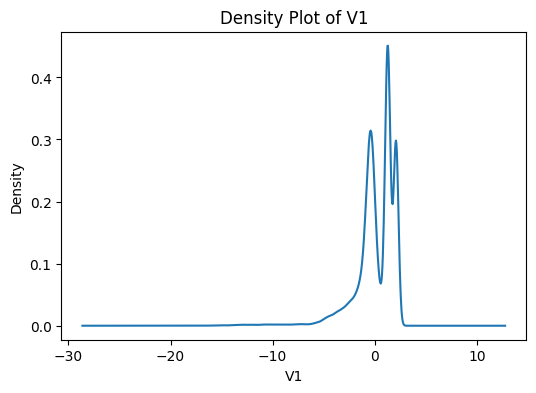

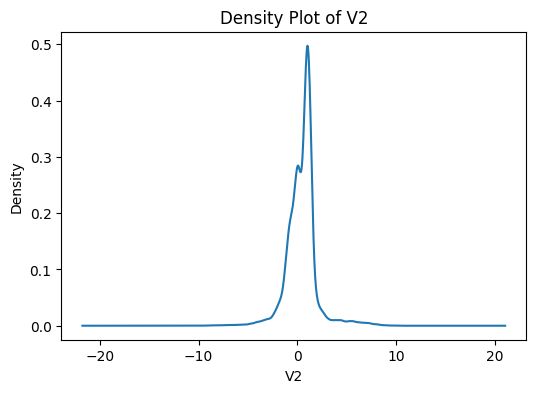

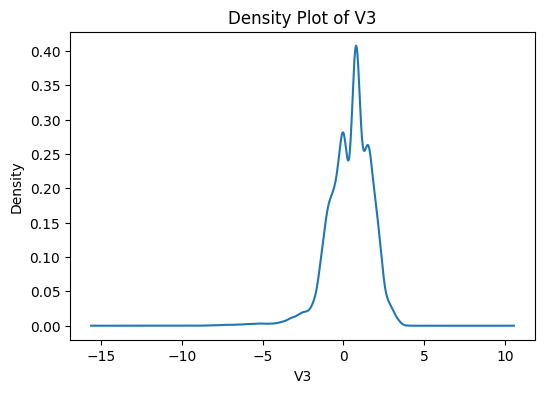

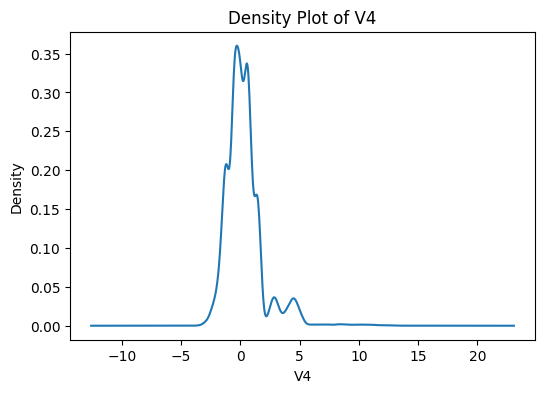

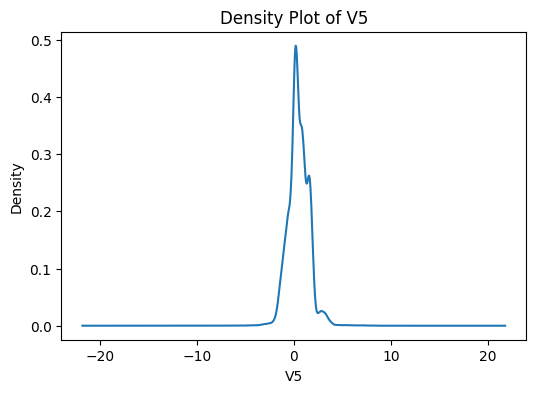

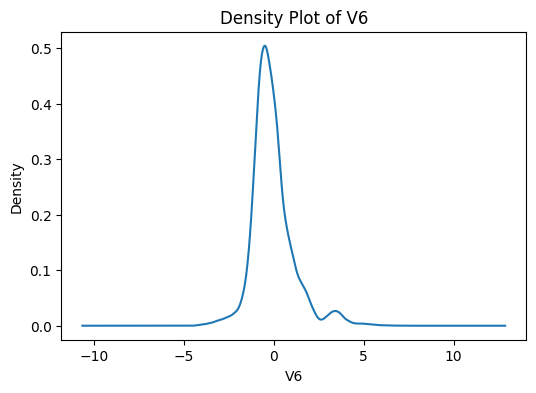

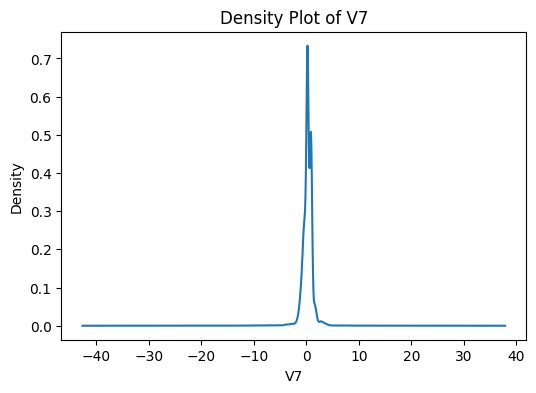

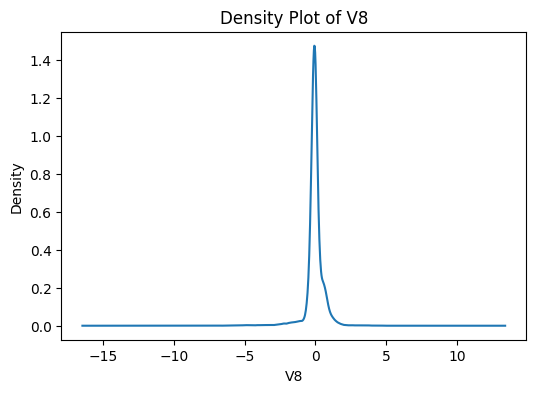

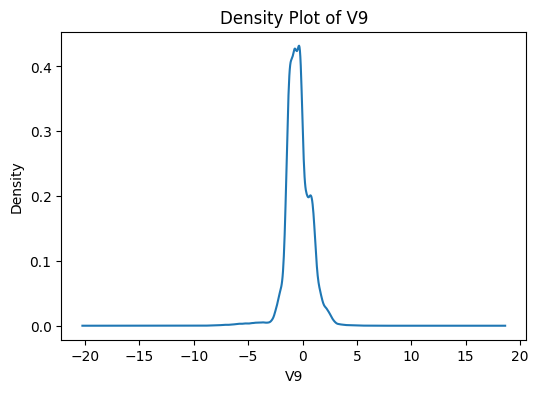

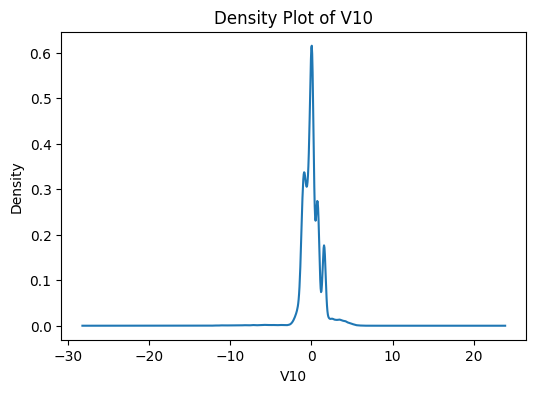

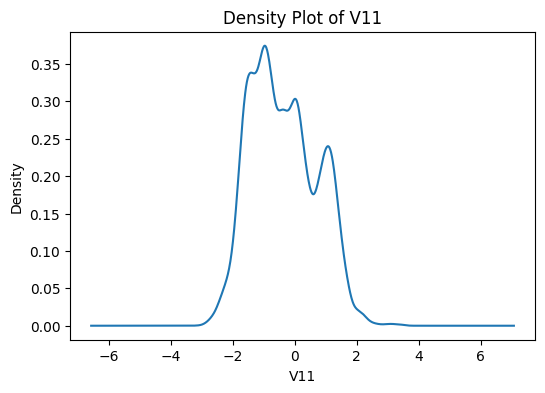

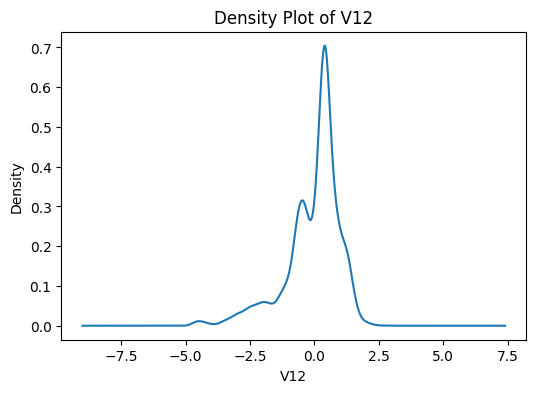

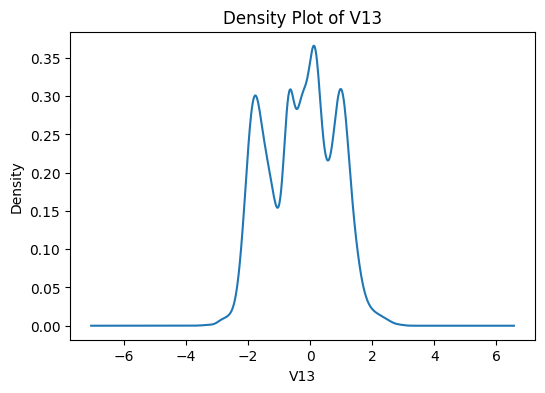

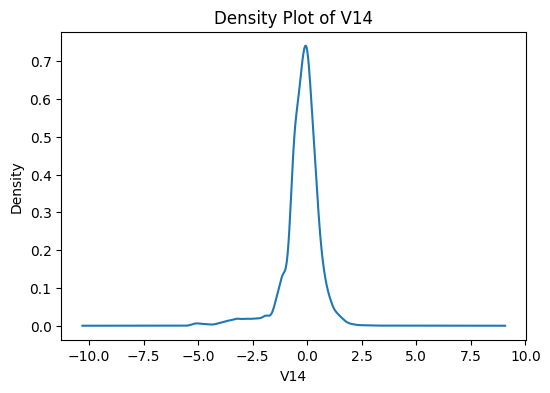

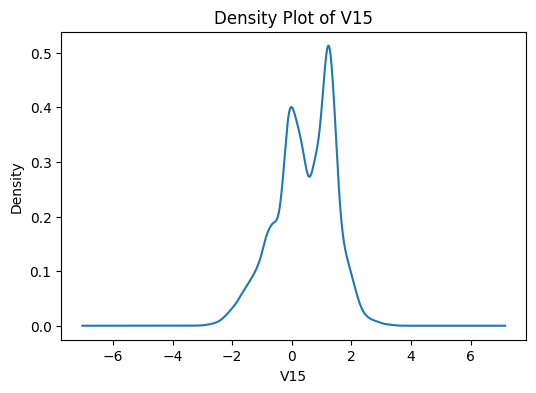

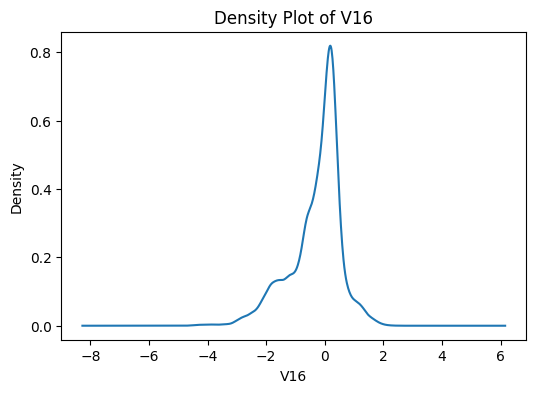

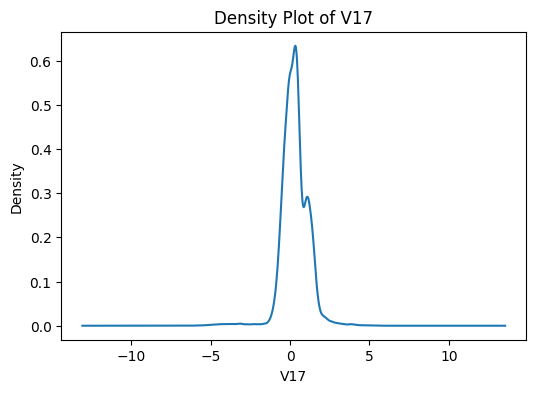

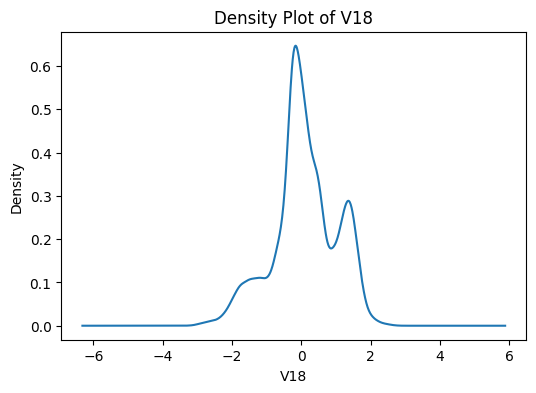

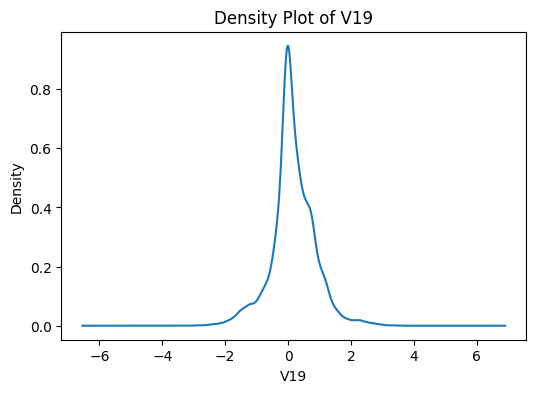

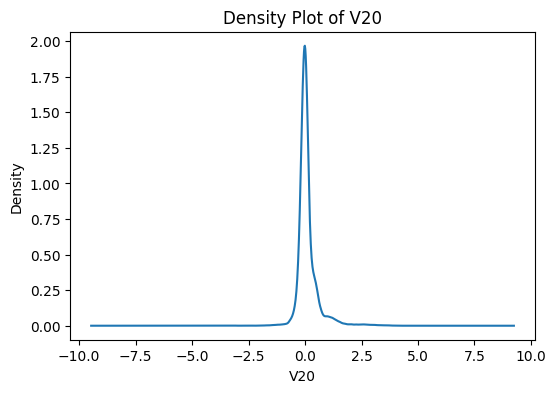

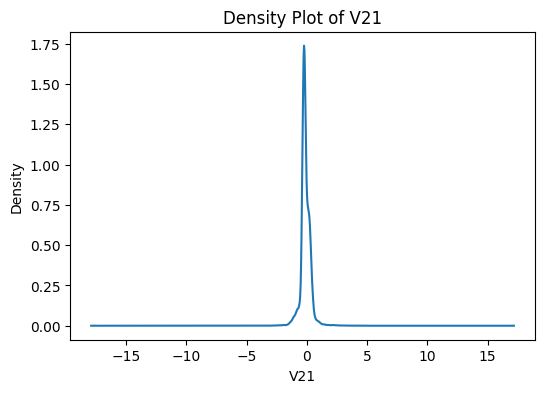

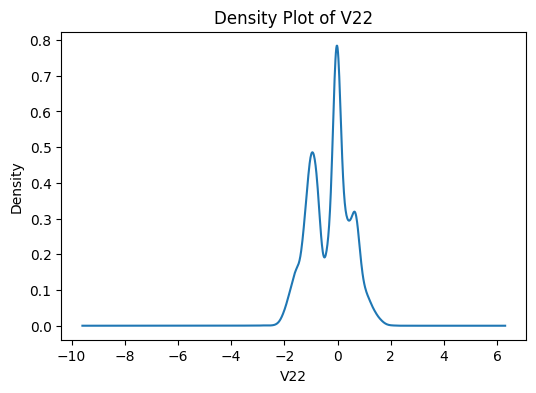

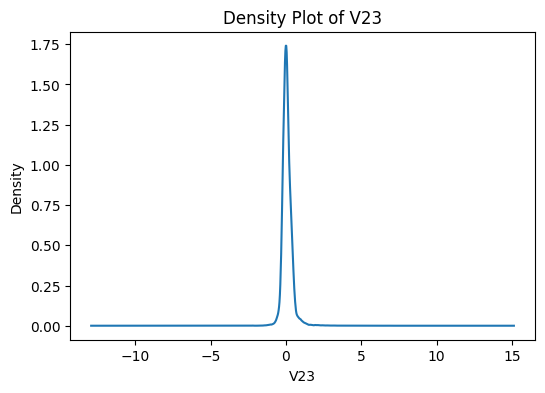

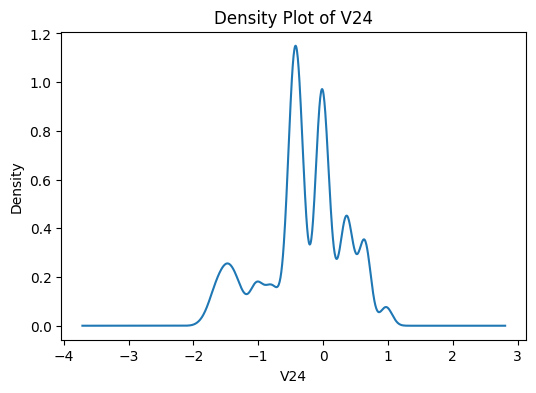

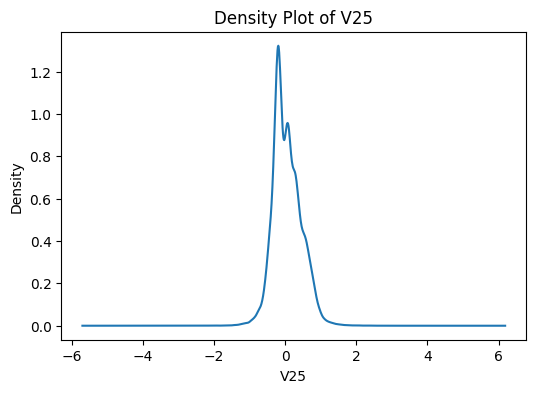

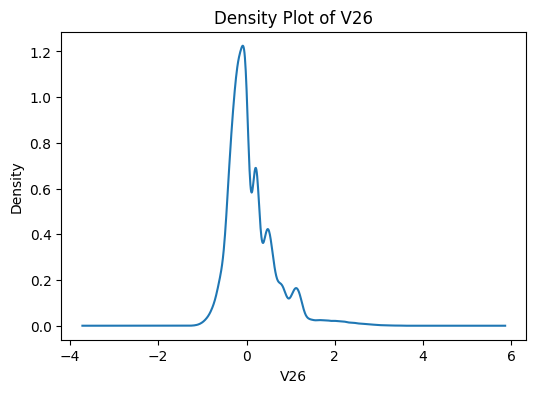

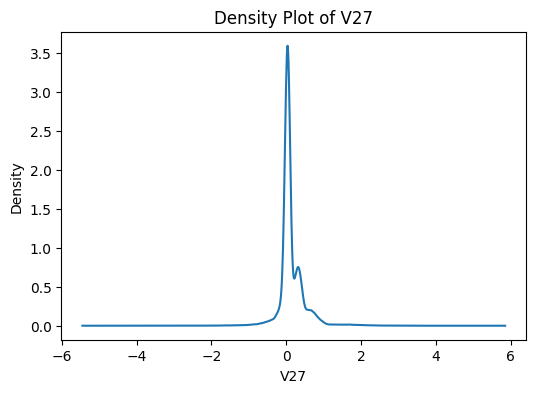

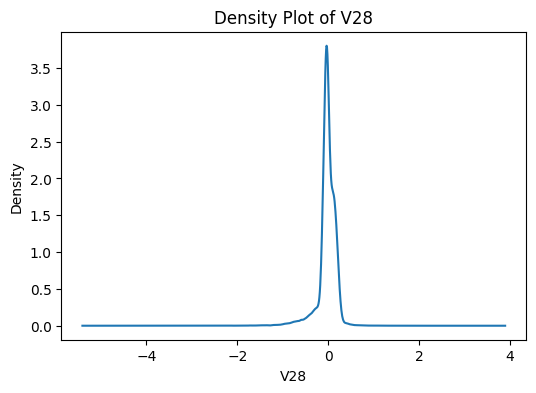

In [ ]:
import matplotlib.pyplot as plt

for column in pca_columns:
    bank_data[column].plot(kind='density', figsize=(6, 4), title=f'Density Plot of {column}')
    plt.xlabel(column)
    plt.show()

Even though most of the PCA features shape around 0, some fully don't, to mitigate this we are gonna scale all the PCA features as well.

Shared features

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize PCA fetaures (V1 to V28)
pca_columns = [f'V{i}' for i in range(1, 29)]
scaler = StandardScaler()
bank_data[pca_columns] = scaler.fit_transform(bank_data[pca_columns])
ecommerce_data[pca_columns] = scaler.transform(ecommerce_data[pca_columns])


Check their distribution after scalling

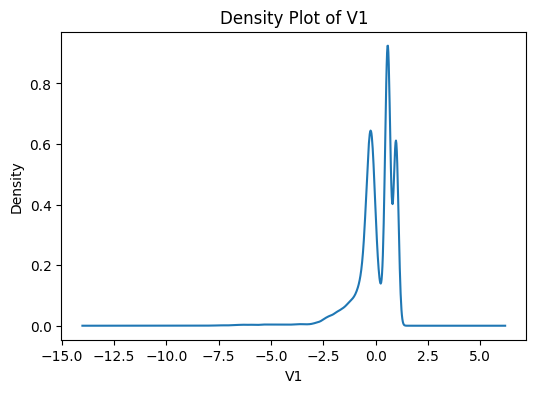

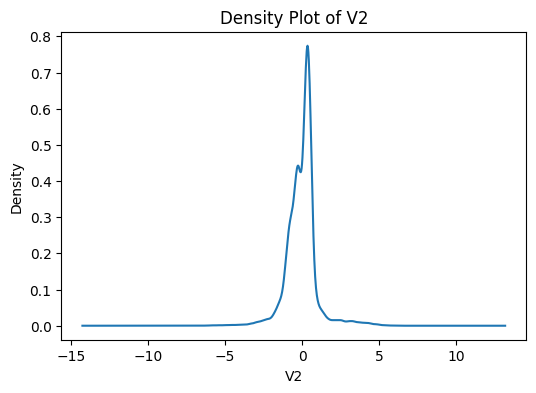

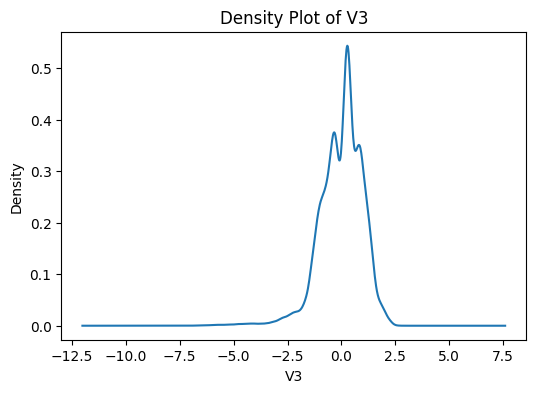

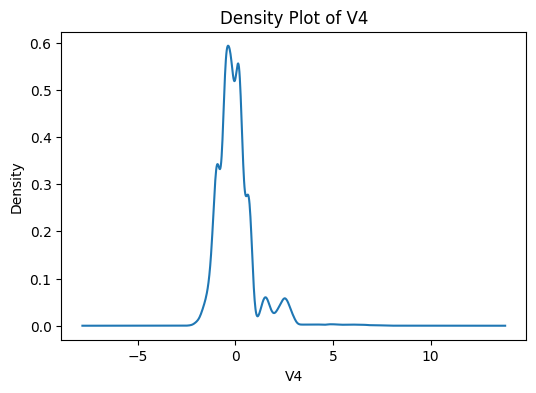

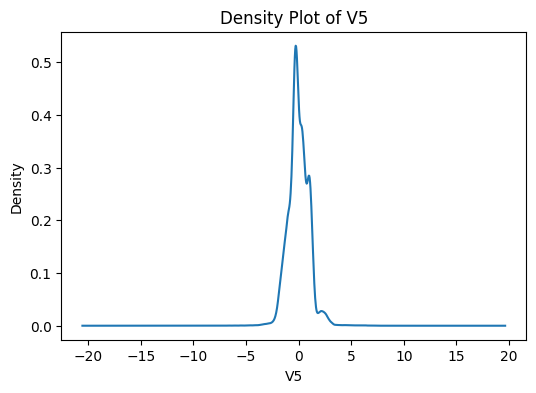

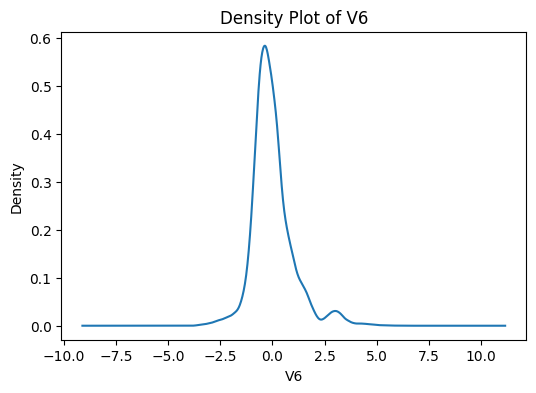

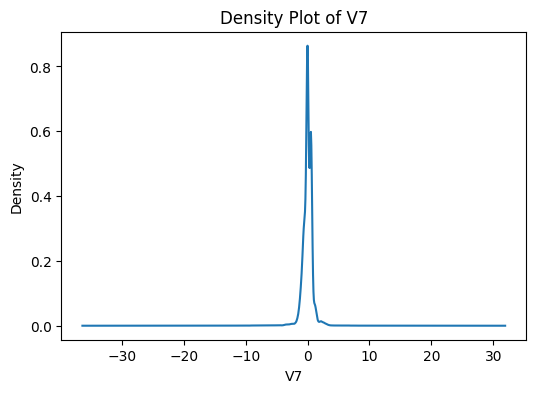

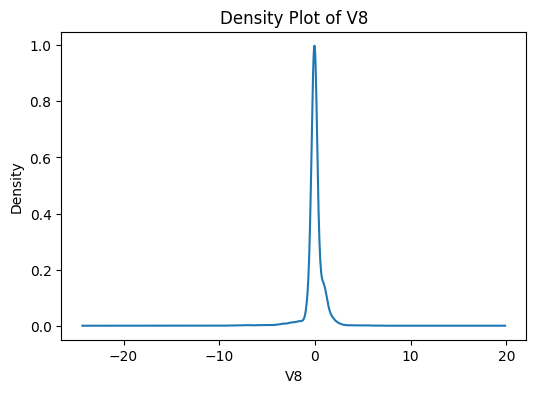

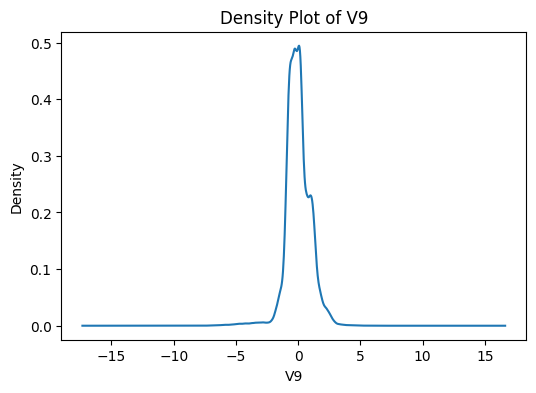

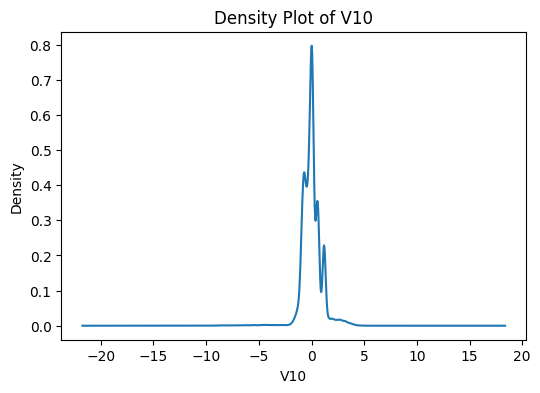

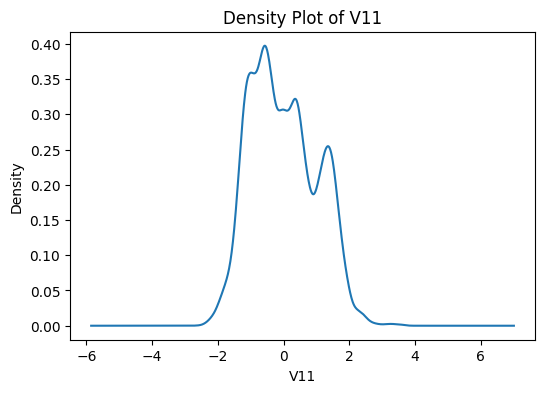

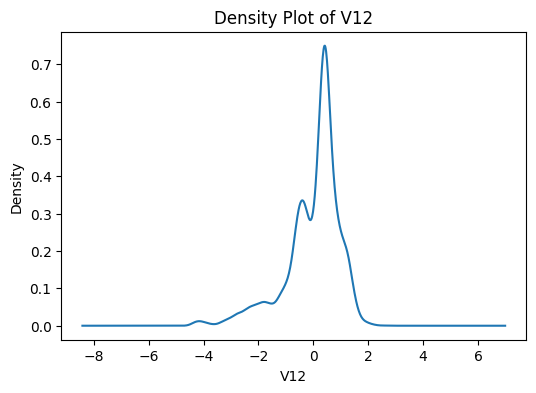

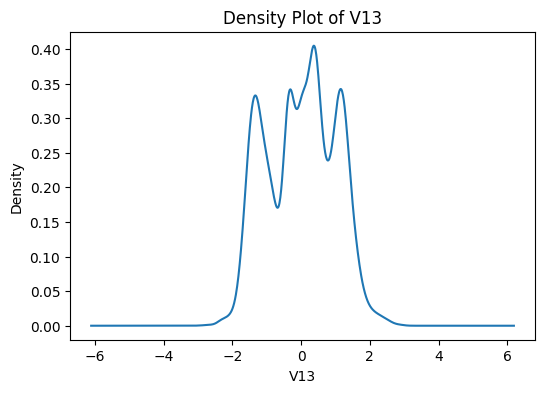

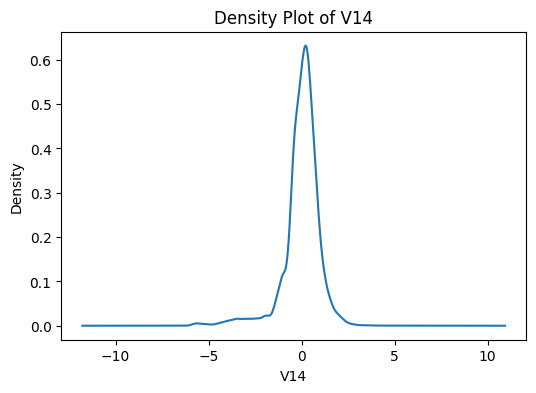

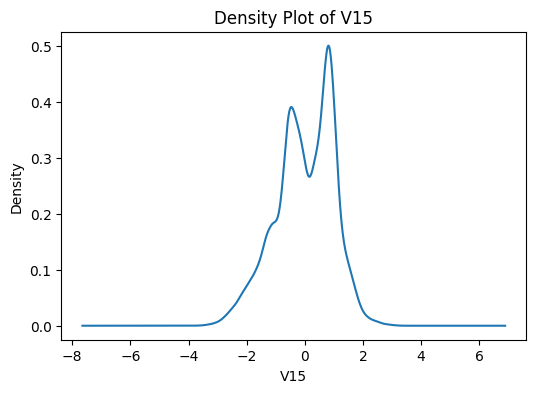

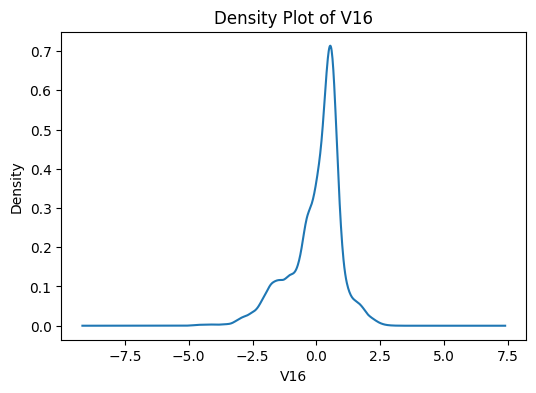

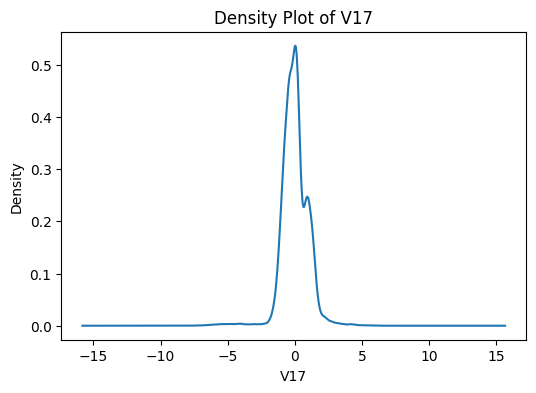

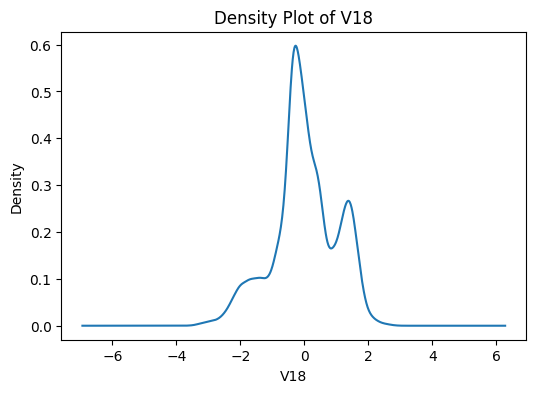

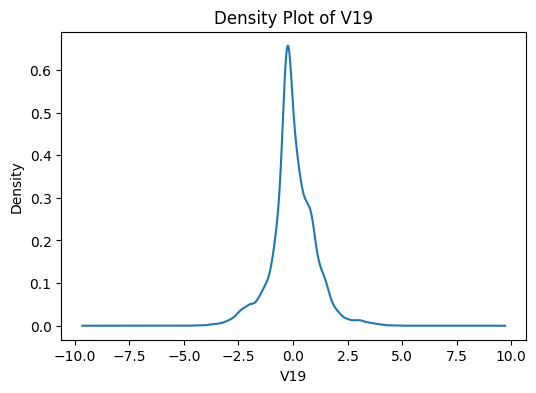

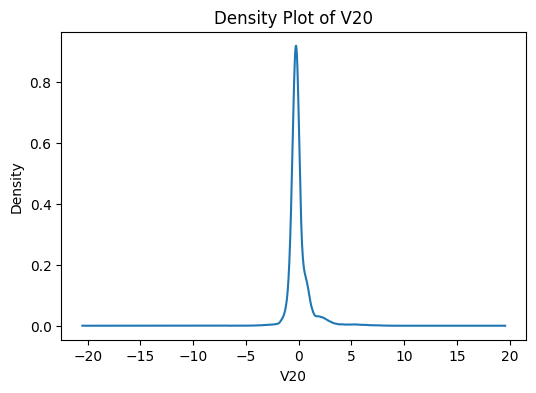

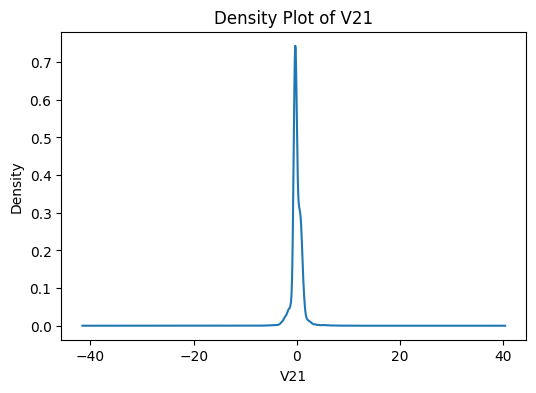

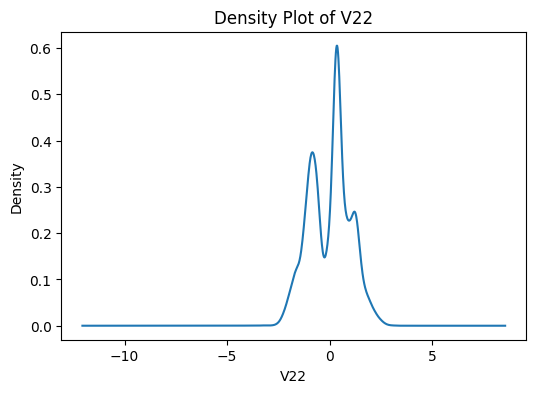

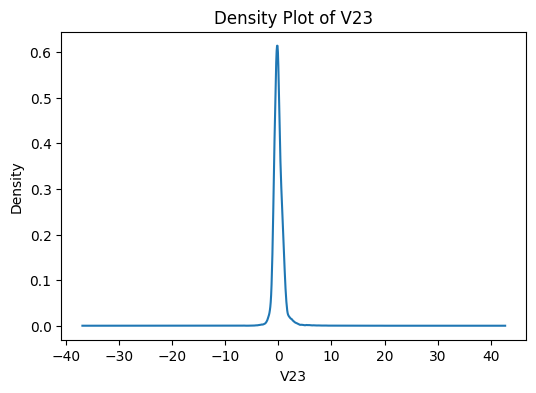

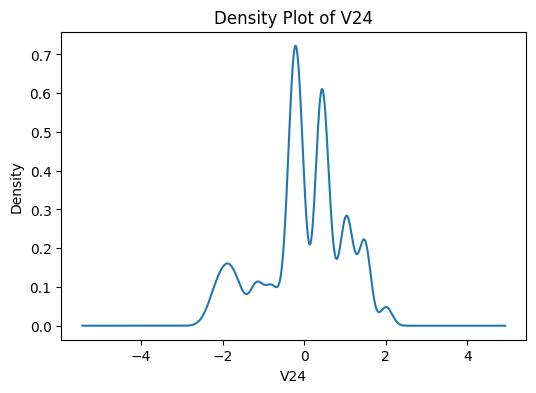

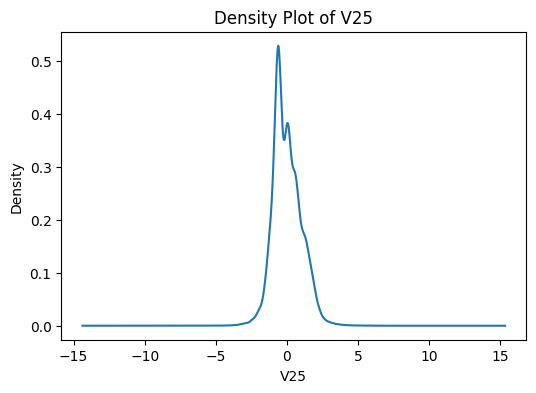

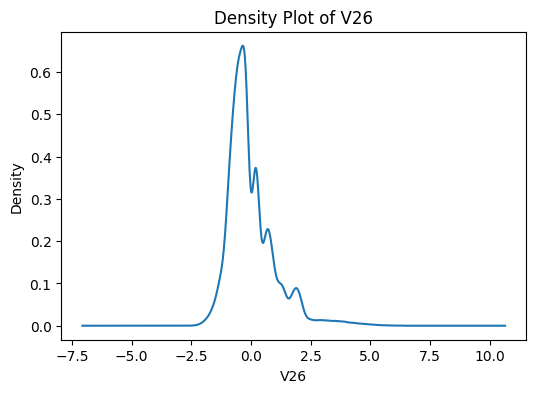

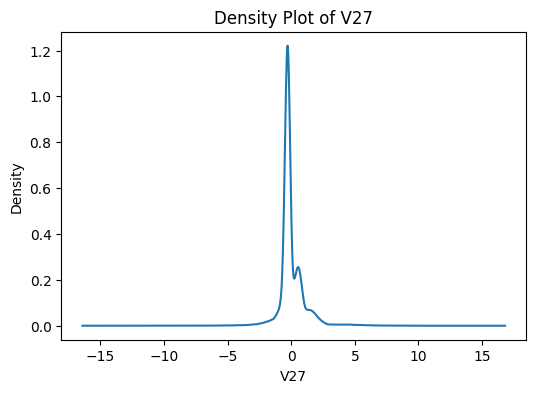

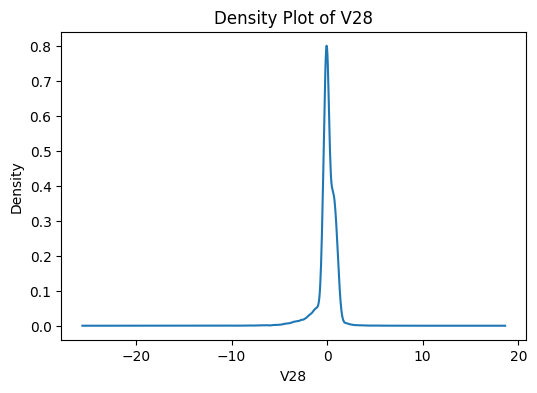

In [ ]:
for column in pca_columns:
    bank_data[column].plot(kind='density', figsize=(6, 4), title=f'Density Plot of {column}')
    plt.xlabel(column)
    plt.show()

In [ ]:
bank_data[pca_columns].describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,8.544200e+04,8.544200e+04,8.544200e+04,8.544200e+04,8.544200e+04,8.544200e+04,8.544200e+04,8.544200e+04,8.544200e+04,8.544200e+04,...,8.544200e+04,8.544200e+04,8.544200e+04,8.544200e+04,8.544200e+04,8.544200e+04,8.544200e+04,8.544200e+04,8.544200e+04,8.544200e+04
mean,-1.288993e-17,4.848276e-17,8.602988e-17,-9.147691e-18,4.033300e-17,-1.330573e-17,-2.715201e-17,6.486544e-18,2.478193e-17,1.846170e-17,...,6.037476e-17,3.580074e-17,-2.066547e-17,-6.719395e-17,-2.636198e-17,3.259904e-17,1.638268e-17,-1.114355e-17,2.128917e-17,1.014562e-17
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,...,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,-8.964771e+00,-7.409035e+00,-7.113923e+00,-2.427737e+00,-1.050057e+01,-4.042338e+00,-1.931558e+01,-1.325404e+01,-8.846829e+00,-1.171572e+01,...,-4.809189e+00,-1.047532e+01,-2.106833e+01,-6.903365e+00,-1.696608e+01,-2.850027e+00,-6.949926e+00,-2.633213e+00,-8.110878e+00,-1.453964e+01
25%,-3.618652e-01,-4.896618e-01,-5.694298e-01,-5.719572e-01,-5.623068e-01,-5.872003e-01,-3.280294e-01,-2.646587e-01,-5.792848e-01,-5.126812e-01,...,-4.672090e-01,-4.573632e-01,-4.377603e-01,-8.206309e-01,-5.245652e-01,-3.736207e-01,-6.813708e-01,-6.344153e-01,-4.038816e-01,-2.611943e-01
50%,1.144028e-01,9.469090e-02,1.405347e-01,-1.524502e-01,-5.959616e-02,-1.569448e-01,1.992069e-02,-1.034810e-02,-5.831483e-02,-2.427917e-02,...,-7.722395e-02,-1.844078e-01,-1.040678e-01,1.907954e-01,-1.075296e-01,-2.185413e-02,-1.070631e-01,-2.513231e-01,-2.160715e-01,5.260449e-02
75%,6.255526e-01,4.367182e-01,6.859024e-01,3.151526e-01,6.129289e-01,3.888486e-01,4.621615e-01,2.879964e-01,5.567665e-01,4.487621e-01,...,5.609632e-01,1.648125e-01,4.823658e-01,6.593075e-01,4.047454e-01,5.919875e-01,6.302461e-01,3.867152e-01,2.918364e-01,5.258037e-01
max,1.134659e+00,6.336255e+00,2.692489e+00,8.398544e+00,9.591527e+00,6.092800e+00,1.484183e+01,8.833702e+00,8.131611e+00,8.348322e+00,...,4.878329e+00,9.565243e+00,1.991924e+01,3.393912e+00,2.277988e+01,2.334518e+00,7.911062e+00,6.224540e+00,8.510525e+00,7.565254e+00


Mean: The mean for all features is close to 0 (within floating-point precision limits). This is expected and aligns with standardization.

Standard Deviation: The standard deviation for all features is close to 1. This ensures that all features contribute equally during model training.

Min/Max: The ranges of some features still show extreme values. For example:
V6 has a maximum of 54.46 and V7 has a maximum of 95.35.
These values are much higher than the typical range (-3 to +3) expected for standardized data, indicating the presence of outliers.

If outliers have big impact on the model then might need to add RobustScaler instead of StandardScaler.

We do not need to add any sort of standarization in Class, Card IDs features.

Class --> is a label to detect if this transaction is fraudulant or not.

Card ID --> is an identifier which was int object but to hide the Card data to comply with PCI DSS complience we sort of Hashed it so this does not need or we cannot scale a string object.

Non-Shared data prep

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy.sparse import hstack

# Shared features for both bank and ecommerce datasets
shared_features = ['Time', 'Amount', 'Card Type', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                   'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23',
                   'V24', 'V25', 'V26', 'V27', 'V28', 'Card ID', 'Class']

# Separate features and labels for bank and ecommerce
X_bank = bank_data[shared_features[:-1]]
y_bank = bank_data['Class']

X_ecommerce = ecommerce_data[shared_features[:-1]]
y_ecommerce = ecommerce_data['Class']

# Preprocessing pipelines for numerical and categorical features
numerical_features = ['Time', 'Amount'] + [f'V{i}' for i in range(1, 29)]
categorical_features = ['Card Type', 'Card ID']

# Numerical transformer (imputation + scaling)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())  # Standard scaling
])

# Categorical transformer (imputation + one-hot encoding)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformations in a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing to both datasets
X_bank_processed = preprocessor.fit_transform(X_bank)
X_ecommerce_processed = preprocessor.transform(X_ecommerce)

# Handle specific features for bank and ecommerce datasets (if applicable)
bank_data_specific_numerical = ['Credit Limit', 'Cardholder Risk Score', 'Number of Active Cards', 'Loyalty Points Available']
ecommerce_data_specific_numerical = ['Transaction Timestamp']

# For bank-specific numerical features
X_bank_specific = bank_data[bank_data_specific_numerical]
X_bank_specific_processed = numerical_transformer.fit_transform(X_bank_specific)

# Feature engineering for datetime (ecommerce only)
def extract_time_features(df):
    # Example: Extract hour, day of week, month
    df['hour'] = df['Transaction Timestamp'].dt.hour
    df['day_of_week'] = df['Transaction Timestamp'].dt.dayofweek
    df['month'] = df['Transaction Timestamp'].dt.month
    return df

# For ecommerce-specific numerical features (including feature extraction for datetime)
ecommerce_data['Transaction Timestamp'] = pd.to_datetime(ecommerce_data['Transaction Timestamp'], errors='coerce')
ecommerce_data = extract_time_features(ecommerce_data)
X_ecommerce_specific_num = ecommerce_data[ecommerce_data_specific_numerical]
X_ecommerce_specific_num_processed = numerical_transformer.fit_transform(X_ecommerce_specific_num)

# Combine all processed features
X_bank_final = hstack([X_bank_processed, X_bank_specific_processed])
X_ecommerce_final = hstack([X_ecommerce_processed, X_ecommerce_specific_num_processed])

X_bank_final = pd.DataFrame(X_bank_final.toarray())
X_ecommerce_final = pd.DataFrame(X_ecommerce_final.toarray())

X_ecommerce_final.head()

# X_bank_final.to_csv("X_bank_final.csv", index=False)
# X_ecommerce_final.to_csv("X_ecommerce_final.csv", index=False)


<ipython-input-33-300ed0002d69>:64: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ecommerce_data['Transaction Timestamp'] = pd.to_datetime(ecommerce_data['Transaction Timestamp'], errors='coerce')


,0,1,2,3,4,5,6,7,8,9,...,85467,85468,85469,85470,85471,85472,85473,85474,85475,85476
0,-0.817443,-0.411434,-1.292937,0.370264,0.452555,0.751762,2.339321,1.201036,0.729865,-0.060063,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.743525,-0.297743,0.595751,-0.541110,-0.365384,-0.028225,-0.138525,0.825959,-0.056053,0.446248,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.186118,-0.351783,-0.508136,0.526806,-0.249920,-0.594971,1.084759,-0.503380,0.535330,-0.022819,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.909167,-0.174799,-0.193811,0.392408,0.113694,1.130018,1.022569,0.124654,0.318417,1.235358,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.669176,-0.450709,0.931871,-0.727027,-0.733833,-0.313515,-0.114031,-0.581515,-0.021155,0.047836,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Visualize missing values

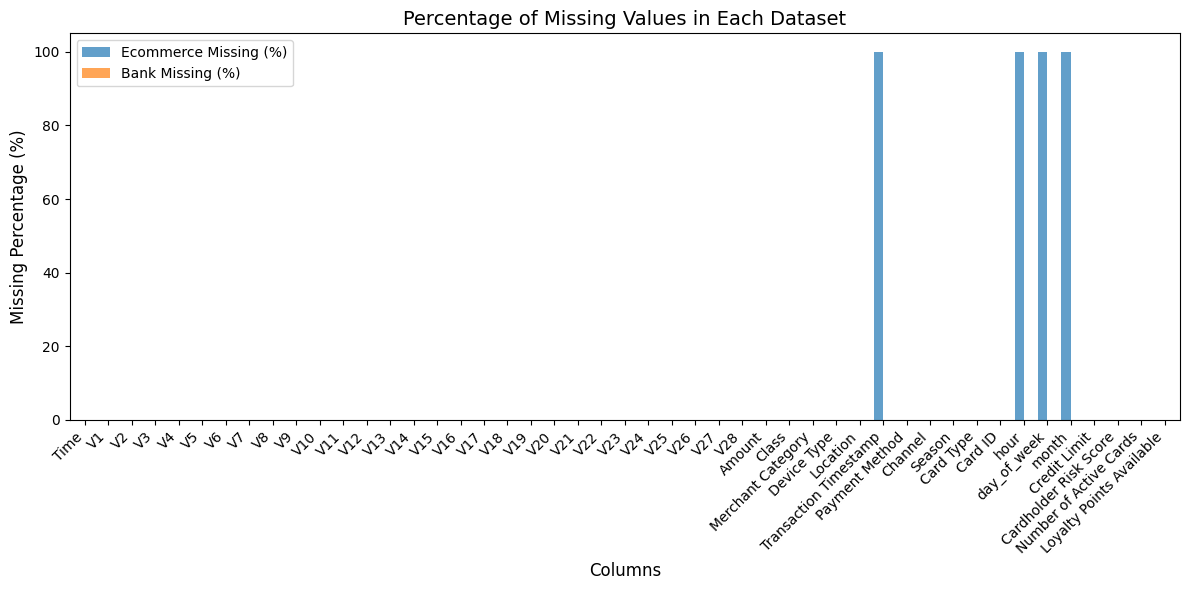

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the percentage of missing values for each column
missing_percentage = pd.concat([
    ecommerce_data.isnull().mean(),
    bank_data.isnull().mean()
], axis=1, keys=["Ecommerce Missing (%)", "Bank Missing (%)"]) * 100

# Plot missing percentage
missing_percentage.plot(kind="bar", figsize=(12, 6), width=0.8, alpha=0.7)
plt.title("Percentage of Missing Values in Each Dataset", fontsize=14)
plt.ylabel("Missing Percentage (%)", fontsize=12)
plt.xlabel("Columns", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()


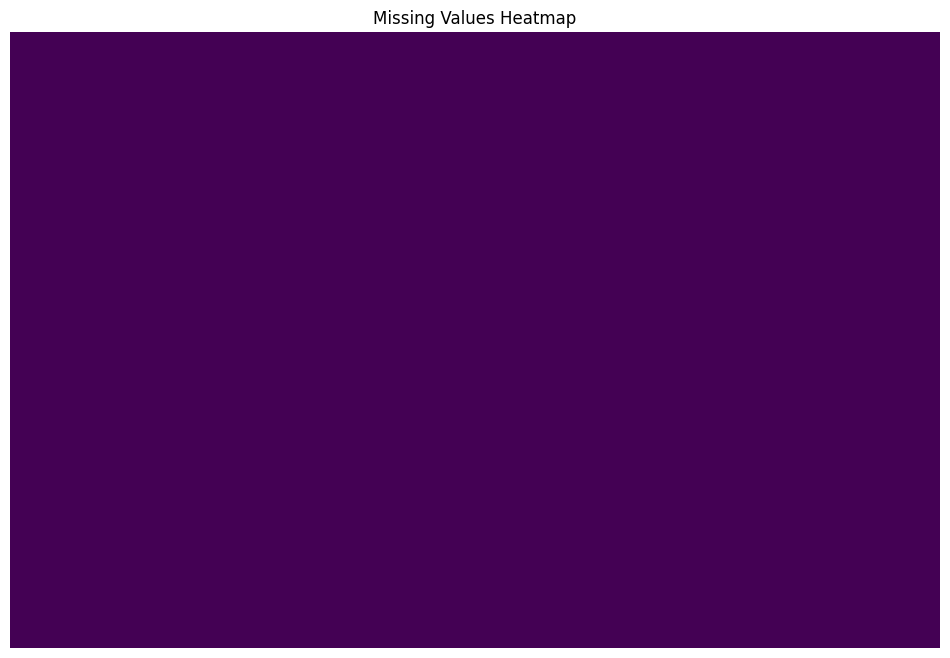

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sample_df = X_ecommerce_final.sample(frac=0.01, random_state=42)
# Visualize missing values in a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(sample_df.isnull(), cmap='viridis', cbar=False, xticklabels=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()



Implementing SMOTE in Python. Often improves model performance by reducing bias toward the majority class.
How SMOTE Works
SMOTE generates synthetic samples by:

Selecting a minority-class sample.
Identifying its k-nearest neighbors in the minority class.
Interpolating a new sample along the line segment joining the sample and one of its neighbors.

In [ ]:
!pip install imbalanced-learn

Create active and passive party by removeing label from ecomerce dataset

In [ ]:
# Sort both datasets by Card ID for alignment
X_bank_final = bank_data.sort_values('Card ID').reset_index(drop=True)
X_ecommerce_final = ecommerce_data.sort_values('Card ID').reset_index(drop=True)

# Remove class labels from ecommerce_data
if 'Class' in X_ecommerce_final.columns:
    X_ecommerce_final = X_ecommerce_final.drop(columns=['Class'])

# Confirm alignment
assert all(X_bank_final['Card ID'] == X_ecommerce_final['Card ID']), "Card IDs are not aligned!"

In [ ]:
!pip install fate_client

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

TODO: Use train test split, then do CV on train data.

In [ ]:
!pip install fate_client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.7/164.7 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.2/722.2 kB 28.2 MB/s eta 0:00:00


In [ ]:
!pipeline init --help

/usr/local/lib/python3.10/dist-packages/pydantic/_internal/_fields.py:132: UserWarning: Field "model_id" in ModelWarehouseChannelSpec has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pydantic/_internal/_fields.py:132: UserWarning: Field "model_version" in ModelWarehouseChannelSpec has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pydantic/_internal/_fields.py:132: UserWarning: Field "model_id" in ModelWarehouseConfSpec has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pydantic/_internal/_fields.py:132: UserWarning: Field "model_version" 